# OLS Linear Regression using numpy

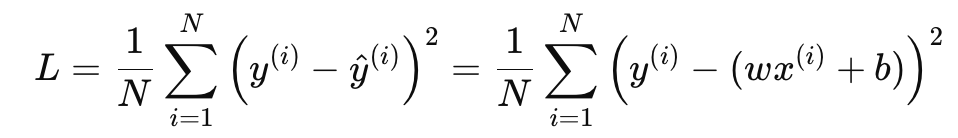

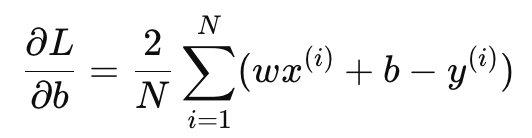

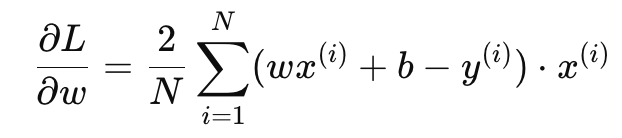

In [ ]:
import numpy as np

class LinearRegression():
    def __init__(self, learning_rate=0.01, epochs=1000, poly_degree=None):
        
        self.alpha = learning_rate
        self.epochs = epochs
        self.weights = None  # Weights (excluding bias)
        self.bias = 0        # Bias term
        self.poly_degree = poly_degree # Flag for polynomial regression
        
    def _polynomial_features(self, X):
        """
        Transforms the input matrix X to include polynomial features up to the specified degree.
        """
        X_poly = X
        for i in range(2, self.poly_degree + 1):  # Add X^2, X^3, ..., X^degree
            X_poly = np.column_stack([X_poly, X ** i])  # Add each power of X as a new feature
        return X_poly
    
    def _polynomial_features(self, X):
        """
        Transforms the input matrix X to include polynomial features up to the specified degree.
        """
        X_poly = X
        for i in range(2, self.poly_degree + 1):  # Add X^2, X^3, ..., X^degree
            X_poly = np.column_stack([X_poly, X ** i])  # Add each power of X as a new feature
        return X_poly
      

    def fit(self, X, y):
        N, n_features = X.shape
        
        if self.poly_degree:
            X = self._polynomial_features(X)

        # Initialize weights and bias
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        
        y = y.reshape(-1, 1)  # Ensure y is a column vector

        # Gradient Descent
        for epoch in range(self.epochs):
            y_pred = self.predict(X) # np.dot(X, self.weights) + self.bias  # Linear prediction
            error = y_pred - y

            # Compute gradients
            gradient_w = (2 / N) * np.dot(X.T, error)
            gradient_b = (2 / N) * np.sum(error)  # equivalent to 2 * np.mean(y_pred - y)
           
            # Update weights and bias
            self.weights = self.weights - self.alpha * gradient_w
            self.bias = self.bias - self.alpha * gradient_b

        return self

    def predict(self, X):
        if self.poly_degree:
            X = self._polynomial_features(X)
        # Make predictions 
        return np.dot(X, self.weights) + self.bias


In [86]:
class LinearRegression():
    def __init__(self, learning_rate=0.01, epochs=1000, poly_degree=None):
        self.alpha = learning_rate  # Learning rate
        self.epochs = epochs  # Number of iterations
        self.weights = None  # Weights (excluding bias)
        self.bias = 0  # Bias term
        self.poly_degree = poly_degree  # Flag for polynomial regression
        
    def _polynomial_features(self, X):
        """
        Transforms the input matrix X to include polynomial features up to the specified degree.
        """
        if self.poly_degree:
            X_poly = X
            for i in range(2, self.poly_degree + 1):  # Add X^2, X^3, ..., X^degree
                X_poly = np.column_stack([X_poly, X ** i])  # Add each power of X as a new feature
            return X_poly
        else:
            return X

    def fit(self, X, y):
        N, n_features = X.shape
        
        # Apply polynomial transformation if poly_degree is provided
        X_poly = self._polynomial_features(X)

        # Initialize weights and bias
        self.weights = np.zeros((X_poly.shape[1], 1))  # Update to match the new number of features
        self.bias = 0
        
        y = y.reshape(-1, 1)  # Ensure y is a column vector

        # Gradient Descent
        for epoch in range(self.epochs):
            # Make predictions
            y_pred = self.predict(X) # Linear prediction - np.dot(X, self.weights) + self.bias
            error = y_pred - y

            # Compute gradients
            gradient_w = (2 / N) * np.dot(X_poly.T, error)
            gradient_b = (2 / N) * np.sum(error)   # equivalent to 2 * np.mean(y_pred - y)

            # Update weights and bias
            self.weights = self.weights - self.alpha * gradient_w
            self.bias = self.bias - self.alpha * gradient_b

        return self

    def predict(self, X):
        # Apply polynomial transformation for prediction
        X_poly = self._polynomial_features(X)
        
        # Make predictions 
        return np.dot(X_poly, self.weights) + self.bias

### Learn y = 3x + 7

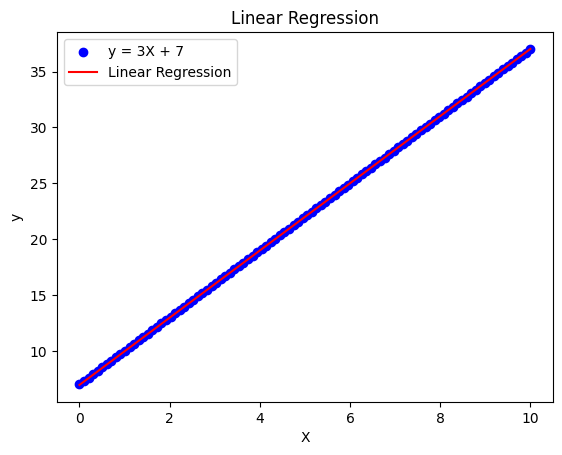

In [87]:
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X + 7

# Instantiate and fit model
model = LinearRegression(learning_rate=0.01, epochs=1000)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue', label='y = 3X + 7')
plt.plot(X, predictions, color='red', label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## Test quadratic function

### Learn y = 3x + 7x^2 + 1  -> normal Linear regression will fail

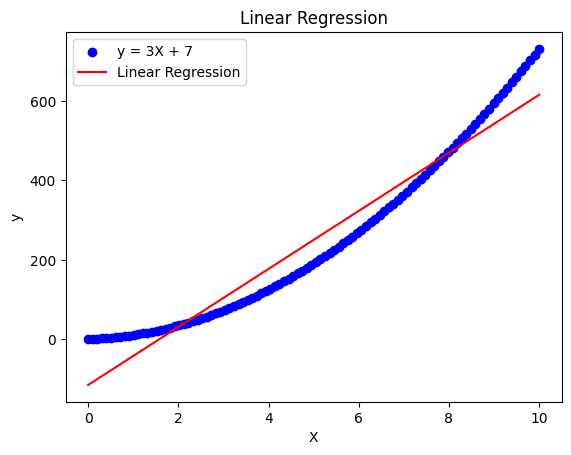

In [88]:
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X + 7 * X**2 + 1 

# Instantiate and fit model
model = LinearRegression(learning_rate=0.01, epochs=10000)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue', label='y = 3X + 7')
plt.plot(X, predictions, color='red', label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


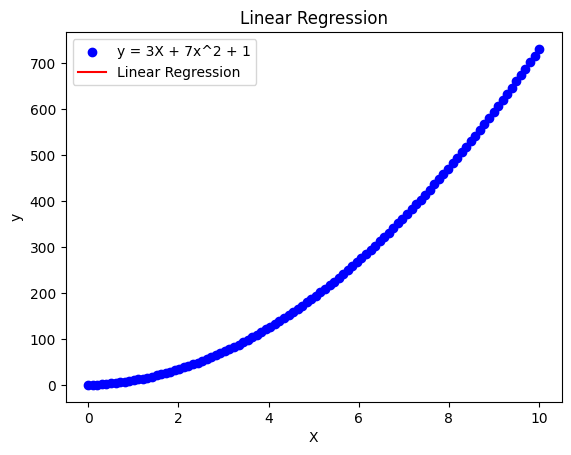

In [ ]:
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X + 7 * X**2 + 1  # quadratic function

# Instantiate and fit model
model = LinearRegression(learning_rate=0.01, epochs=10000, poly_degree=2)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue', label='y = 3X + 7x^2 + 1')
plt.plot(X, predictions, color='red', label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


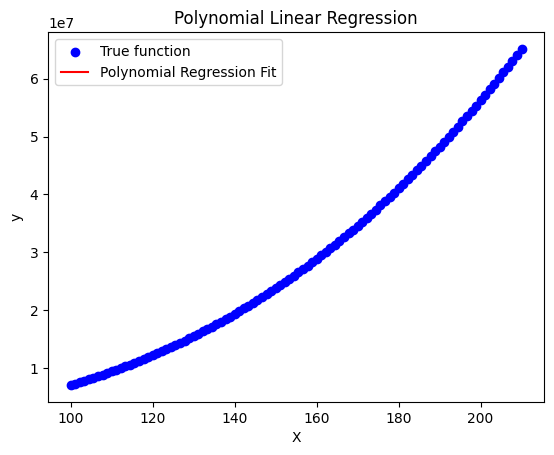

In [58]:
# test out of sample data
X_out_of_sample = X = np.linspace(100, 210, 100).reshape(-1, 1)
true = 3 * X + 7 * X**2 + 7 * X**3  # y = 3X + 7X^2 + 7X^3

# Make predictions
predictions = model.predict(X_out_of_sample)

# Plot the results
plt.scatter(X, true, color='blue', label='True function')
plt.plot(X, predictions, color='red', label='Polynomial Regression Fit')
plt.title('Polynomial Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()